In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
#on charge le dataset multilingue
multilingual_dataset= pd.read_csv("data/multilingual_dataset.csv")
#on affiche l'affiche
multilingual_dataset

,texts,lg
0,As much as I wanted to love the box it came br...,en
1,The app opens and immediately crashes. Can't w...,en
2,"Mal producto. Una caída desde 50 cm, y la fund...",es
3,"Sieht ganz gut aus,ist schlecht zu montieren u...",de
4,I needed this for a project. The scroll came w...,en
...,...,...
39995,Je suis extrêmement déçue par cet achat. Je co...,fr
39996,Ich bin geschockt habe 3 Kinder aber sowas ist...,de
39997,El producto no llegué a recibirlo. Después de ...,es
39998,This board could have been a perfect board for...,en


In [3]:
#on affiche les informations sur le dataset en utilisant la méthode info() 
multilingual_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   texts   40000 non-null  object
 1   lg      40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


les informations sur le dataset nous montrent le dataset est de classe pandas, le nombre de colonnes et de lignes 40000 sur 2, 0 valeurs nulls, la mémoire utilisée par le dataset est 625.1+ KB


In [4]:
#on affiche les statistiques de la colonne "lg" en utilisant la méthode describe()
multilingual_dataset["lg"].value_counts()

lg
en    10000
es    10000
de    10000
fr    10000
Name: count, dtype: int64

<Axes: xlabel='lg'>

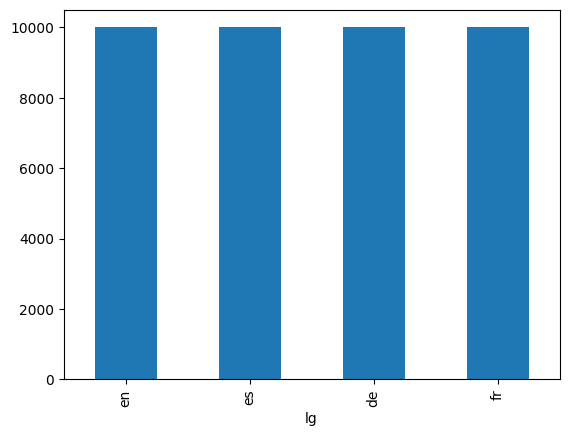

In [8]:
#on visualise les statistiques de la colonne "lg" en utilisant les méthodes value_counts() de pandas et plot. bar() de la bibliothèque matplotlib

multilingual_dataset["lg"].value_counts().plot.bar()

on voit que notre dataset contient différentes langues ou classes qui sont toutes équilibrées, 1000 exemples par classe.


In [10]:
#on importe la fonction train_test_split de la bibliothèque sklearn.model_selection pour diviser le dataset en train et test
from sklearn.model_selection import train_test_split

In [11]:
# en premier temps on divise le dataset en x et y. x= texts et y= lg (classes)
x= multilingual_dataset["texts"]
y= multilingual_dataset["lg"]

# Division du dataset en train (70%) et reste (30%)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, train_size=0.70, random_state=42)

# Division du reste en dev (50%) et test (50%)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=42)

#on affiche les dimensions des différents ensembles de données à l'aide de la méthode shape
print("x_trai_set", X_train.shape, "y_train_set:", y_train.shape)
print("x_test_set:", X_test.shape, "y_test_set:", y_test.shape)
print("x_dev_set:", X_dev.shape, "y_dev_set:", y_dev.shape)

x_trai_set (28000,) y_train_set: (28000,)
x_test_set: (6000,) y_test_set: (6000,)
x_dev_set: (6000,) y_dev_set: (6000,)


             ***encodage des données avec countvectorizer***       

on va entrainer deux model de countvectorizer avec des paramètres différents


**premier model** avec annalyse de mots, sans suppression des stop words et avec unigrammes(1.1)

In [12]:
#on importe la fonction CountVectorizer de la bibliothèque sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

#on crée une instance de la classe CountVectorizer et on affecte les paramètres suivants: max_features=1000, analyzer="word", stop_words= None, ngram_range=(1,1)
vectorizer = CountVectorizer(max_features=1000, analyzer="word", stop_words= None, ngram_range=(1,1))

In [13]:
# on entraine le vectorizer sur le train set en utilisant la méthode fit() de la classe CountVectorizer de sklearn
vectorizer.fit(X_train)

CountVectorizer(max_features=1000)

In [ ]:
# on transforme le texts de notre dataset en vecteurs  à l'aide de countvectorizer qu'on a entrainé ci-dessus en utilisant la méthode transform() de la classe CountVectorizer de sklearn
X_train_vec = vectorizer.transform(X_train)
print("vecteur_x_train:", X_train_vec.shape)

X_dev_vec = vectorizer.transform(X_dev)
print("vecteur_x_dev:", X_dev_vec.shape)

X_test_vec = vectorizer.transform(X_test)
print("X_test_vec:", X_test_vec.shape)

vecteur_x_train: (28000, 1000)
vecteur_x_dev: (6000, 1000)
X_test_vec: (6000, 1000)


In [16]:
#on imorte le LabelEncoder de sklearn.preprocessing pour encoder les classes
from sklearn.preprocessing import LabelEncoder
# Initialisation du LabelEncoder
label_encoder = LabelEncoder()

In [17]:
# Encodage des étiquettes
y_train_encoded = label_encoder.fit_transform(y_train)
print(y_train_encoded.shape)

y_dev_encoded = label_encoder.transform(y_dev)
print(y_dev_encoded.shape)

y_test_encoded = label_encoder.transform(y_test)
print(y_test_encoded.shape)

# Vérification des étiquettes encodées
print("étiquettes encodés y_train:", y_train_encoded[:10])
print("étiquettes encodés  y_dev:", y_dev_encoded[:10])
print("étiquettes encodés  y_test:", y_test_encoded[:10])

(28000,)
(6000,)
(6000,)
étiquettes encodés y_train: [0 3 3 1 2 0 0 1 2 3]
étiquettes encodés  y_dev: [1 3 3 3 1 3 3 0 1 0]
étiquettes encodés  y_test: [2 1 0 1 0 0 0 3 2 3]


In [18]:
#on vérifie les classes encodées
label_encoder.classes_

array(['de', 'en', 'es', 'fr'], dtype=object)

In [19]:
mapping_classes = {} # on crée un dictionnaire qui servirait de mapping
for i, classe in enumerate(label_encoder.classes_):
    # chaque index et nom de classe devient une clé dans le dictionnaire
    mapping_classes[i] = classe
    mapping_classes[classe] = i
print(mapping_classes)

{0: 'de', 'de': 0, 1: 'en', 'en': 1, 2: 'es', 'es': 2, 3: 'fr', 'fr': 3}


on voit que les classes sont bien encodées. chaque classe est associée à un entier unique et vice versa.

**Entrainer un medele de logisticsregresion et un model de KNN avec la premère virsion encodé de countvectorize**



1. ***medel de logiticRegression***

In [20]:
#importer la classe LogisticRegression de la bibliothèque sklearn.linear_model
from sklearn.linear_model import LogisticRegression
#importer les fonctions classification_report, precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import classification_report, precision_score, recall_score,f1_score, accuracy_score

In [21]:
# entraîner le modèle de régression logistique 
lr_v1= LogisticRegression()
lr_v1.fit(X_train_vec, y_train_encoded)

LogisticRegression()

In [22]:
# évaluation du medel avec nos donné de dev
lr_v1_pred_dev= lr_v1.predict(X_dev_vec)
print(classification_report(y_dev_encoded, lr_v1_pred_dev))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1477
           1       1.00      1.00      1.00      1460
           2       1.00      1.00      1.00      1534
           3       1.00      1.00      1.00      1529

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [23]:
#tester le le model avec nos données de test
lr_v1_pred_test= lr_v1.predict(X_test_vec)
print(classification_report(y_test_encoded, lr_v1_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1529
           1       1.00      1.00      1.00      1544
           2       1.00      1.00      1.00      1493
           3       1.00      1.00      1.00      1434

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



Notre model de lr_v1 montre une performance exceptionnelle, avec une précision de 1.00, un recall de 1.00 et un f1-score de 1.00 sur les donnéesd de validation et de test. ce qui est très bien. Il est particulièrement robuste et équilibré entre précision et rappel.


### Sauvegarder le modèle sur le disque

In [25]:
# on va sauvegarder les resultats de chaque modele dans ce dictionnaire
results = {} # on crée un dictionnaire vide pour stocker les résultats des modèles pour les comparer plus tard.
results ['lr_v1']= float(accuracy_score(y_test_encoded, lr_v1_pred_test))

**Deuxième model countvectorizer** avec annalyse de chatactères, sans suppression des stop words et avec ngram_ranfe(1.3)

In [26]:
#impote countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#on crée une instance de la classe CountVectorizer et on affecte les paramètres suivants: max_features=1000, analyzer="char", ngram_range=(1,3)
vectorizer= CountVectorizer(max_features=1000, analyzer="char", ngram_range=(1,3))
#on entraine le vectorizer sur le train set en utilisant la méthode fit() de la classe CountVectorizer de sklearn
vectorizer.fit(X_train)


CountVectorizer(analyzer='char', max_features=1000, ngram_range=(1, 3))

on encode nos données avec ce vountvectorizere

In [27]:
# on transforme le texts de notre dataset en vecteurs  à l'aide de countvectorizer qu'on a entrainé ci-dessus en utilisant la méthode transform() de la classe CountVectorizer de sklearn
Xtrain_vec = vectorizer.transform(X_train)
print("xtrain_vec:", Xtrain_vec.shape)

Xdev_vec = vectorizer.transform(X_dev)
print("xdev_vec:", Xdev_vec.shape)

Xtest_vec = vectorizer.transform(X_test)
print("Xtest_vec:", Xtest_vec.shape)

xtrain_vec: (28000, 1000)
xdev_vec: (6000, 1000)
Xtest_vec: (6000, 1000)


In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

# encodage des classes
ytrain_vec = label_encoder.fit_transform(y_train)
print(ytrain_vec.shape)

ydev_vec = label_encoder.transform(y_dev)
print(ydev_vec.shape)

ytest_vec = label_encoder.transform(y_test)
print(ytest_vec.shape)


(28000,)
(6000,)
(6000,)


In [29]:
label_encoder.classes_
#on crée un dictionnaire qui servirait de mapping pour les classes encodées et les classes originales
mapping_classes= {}
for i, classe  in enumerate(label_encoder.classes_):
    mapping_classes[i]= classe
    mapping_classes[classe]= i
print(mapping_classes)

{0: 'de', 'de': 0, 1: 'en', 'en': 1, 2: 'es', 'es': 2, 3: 'fr', 'fr': 3}


2. **Entrinement d'un model de ***kNN***

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#instantier le model en définissant K à 3 
knn_v1 = KNeighborsClassifier(n_neighbors=3)
knn_v1

KNeighborsClassifier(n_neighbors=3)

In [34]:
# on entraine le model avec xtrain_vec et ytrain_encode
knn_v1.fit(Xtrain_vec, ytrain_vec)

KNeighborsClassifier(n_neighbors=3)

In [35]:
#on valide le model
knn_v1_pred_val= knn_v1.predict(Xdev_vec)
print(classification_report(ydev_vec, knn_v1_pred_val))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1477
           1       1.00      0.99      1.00      1460
           2       1.00      1.00      1.00      1534
           3       0.99      1.00      0.99      1529

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [36]:
#on teste le model
knn_v1_pred_test= knn_v1.predict(Xtest_vec)
print(classification_report(ytest_vec, knn_v1_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1529
           1       1.00      0.99      1.00      1544
           2       1.00      1.00      1.00      1493
           3       0.99      1.00      0.99      1434

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



Notre modèle knn_v1 a une bonne performance avec des scores de précision, de rappel et d’F1-score proches ou égales à 1.00 pour toutes les classes, et ce resultat vien après quelques ajustement sur le ngram_range qu'on avait déffinit à (3,5).  y a une légère baisse de la précision pour la classe 3 qui pourrait être étudiée, mais elle reste négligeable vu les scores élevés.

In [37]:
#on sauvegarde le model
results ['knn1']= float(accuracy_score(ytest_vec, knn_v1_pred_test))


             ***encodage des données avec TF-IDF***       

on va entrainer deux model de TF-IDF avec des paramètres différents


**premier model** avec annalyse de mots, sans suppression des stop words et avec utilisation de IDF (l'importance inverse des documents)

In [38]:
#on importe la classe TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#on crée une instance de la classe TfidfVectorizer et on affecte les paramètres suivants: max_features=1000, analyzer="word", use_idf=True
tfidf_vec = TfidfVectorizer(max_features=1000, analyzer= "word", use_idf= True)

In [39]:
# on peut entraîner et transformer les données en une seule commande
X_train_tf = tfidf_vec.fit_transform(X_train)
print(" X_train_tf:", X_train_tf.shape)

# on encode les données de validation
X_dev_tf = tfidf_vec.transform(X_dev)

print("X_dev_tf:", X_dev_tf.shape)

# on encode les données de test
X_test_tf = tfidf_vec.transform(X_test)

print("X_test_tf:", X_test_tf.shape)

 X_train_tf: (28000, 1000)
X_dev_tf: (6000, 1000)
X_test_tf: (6000, 1000)


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()


# Encodage des étiquettes
y_train_tf = label_encoder.fit_transform(y_train)
print(y_train_tf.shape)

y_dev_tf = label_encoder.transform(y_dev)
print(y_dev_tf.shape)

y_test_tf = label_encoder.transform(y_test)
print(y_test_tf.shape)


(28000,)
(6000,)
(6000,)


In [41]:
# Vérification des étiquettes encodées e
label_encoder.classes_
#on crée un dictionnaire qui servirait de mapping pour les classes encodées et les classes originales
mapping_classes= {}
for i, classe in enumerate (label_encoder.classes_):
    
    mapping_classes[i]= classe
    mapping_classes [classe]= i

**Entrainer un medele de logisticsregresion et un model de KNN avec la virsion encodé de TF-IDF**



1. ***medel de logisticRegression v_2***

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

lr_v2= LogisticRegression()
lr_v2.fit(X_train_tf, y_train_tf)

LogisticRegression()

In [43]:
#on valide le mode
lr_v2_pred_val= lr_v2.predict(X_dev_tf)
print(classification_report(y_dev_tf, lr_v2_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1477
           1       1.00      1.00      1.00      1460
           2       1.00      1.00      1.00      1534
           3       1.00      1.00      1.00      1529

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [44]:
#on teste le model
lr_v2_pred_test= lr_v2.predict(X_test_tf)
print(classification_report(y_test_tf, lr_v2_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1529
           1       1.00      1.00      1.00      1544
           2       1.00      1.00      1.00      1493
           3       1.00      1.00      1.00      1434

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



Notre model de lr_v2 montre une performance exceptionnelle, avec une précision, un recall de  et un f1-score de 1.00 sur les classe de donnéesd de validation et de test.

In [45]:
#on sauvegarde le model
results ['lr_v2']= float(accuracy_score(y_test_tf, lr_v2_pred_test))


**Deuxième model** avec annalyse par chractère, sans suppression des stop words et avec utilisation de IDF (l'importance inverse des documents) ngram_range(2,4)


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
#on crée une instance de la classe TfidfVectorizer et on affecte les paramètres suivants: max_features=1000, analyzer="char", use_idf=True, ngram_range=(2,4)
tfidf_vec = TfidfVectorizer(max_features=1000, analyzer= "char", use_idf= True, ngram_range=(2,4))

In [48]:
# on peut entraîner et transformer les données en une seule commande
X_train_tf1 = tfidf_vec.fit_transform(X_train)
print(" X_train_tf:", X_train_tf1.shape)

# on encode les données de validation
X_dev_tf1 = tfidf_vec.transform(X_dev)

print("X_dev_tf:", X_dev_tf1.shape)

# on encode les données de test
X_test_tf1 = tfidf_vec.transform(X_test)

print("X_test_tf:", X_test_tf1.shape)

 X_train_tf: (28000, 1000)
X_dev_tf: (6000, 1000)
X_test_tf: (6000, 1000)


In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

# Encodage des étiquettes
y_train_tf1 = label_encoder.fit_transform(y_train)
print(y_train_tf1.shape)

y_dev_tf1 = label_encoder.transform(y_dev)
print(y_dev_tf1.shape)

y_test_tf1 = label_encoder.transform(y_test)
print(y_test_tf1.shape)


(28000,)
(6000,)
(6000,)


In [50]:
label_encoder.classes_
mapping_classes= {}
for i, classe in enumerate (label_encoder.classes_):
    
    mapping_classes[i]= classe
    mapping_classes [classe]= i

2. ***medel de KNN v_2 avec tf-idf***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#instantier le model en définissant K à 3
knn_v2 = KNeighborsClassifier(n_neighbors=3)
knn_v2

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# on entraine le model avec xtrain_vec et ytrain_encode
knn_v2.fit(X_train_tf1, y_train_tf1)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#on valide le model
knn_v2_pred_dev= knn_v2.predict(X_dev_tf1)
print(classification_report(y_dev_tf1, knn_v2_pred_dev))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1477
           1       1.00      1.00      1.00      1460
           2       1.00      1.00      1.00      1534
           3       1.00      1.00      1.00      1529

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [54]:
knn_v2_pred_test= knn_v2.predict(X_test_tf1)
print(classification_report(y_test_tf1, knn_v2_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1529
           1       1.00      1.00      1.00      1544
           2       1.00      1.00      1.00      1493
           3       1.00      1.00      1.00      1434

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



Notre modèle knn_v2 a de très bonne performance comme les autre model precedent avec des scores de précision, de rappel et d’F1-score proches ou égales à 1.00 pour toutes les classes.

In [56]:
#on sauvegarde le model
results ['knn2']= float(accuracy_score(y_test_tf1, knn_v2_pred_test))

On compare les résultats des différents modèles pour choisir le meilleur en terme de performance et la métrique de  accuracy_score et ecrire sa pipeline.

In [57]:
#on affiche les résultats des différents modèles 
for k, v in results.items():
    print(k,v)


lr_v1 0.9993333333333333
knn1 0.9953333333333333
lr_v2 0.9991666666666666
knn2 0.9981666666666666


{'lr_v1': 0.9993333333333333, 'knn1': 0.9953333333333333, 'lr_v2': 0.9991666666666666, 'knn2': 0.9981666666666666}


<Axes: >

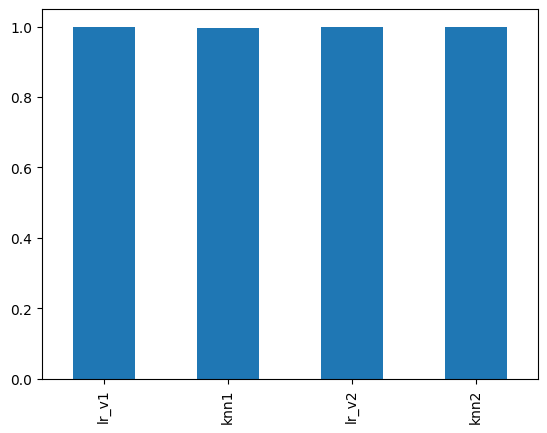

In [58]:
#on affiche les résultats des différents modèles en utilisant un graphique en barres
print(results)
viz = pd.Series(results)
viz.plot.bar()

Le graphe montrent que tous les model on des excellentes performances, avec des scores supérieurs à 0.99. Les modèles de régression logistique (lr_v1 et lr_v2) se démarquent légèrement avec les meilleurs scores globaux (99.93 % et 99.92 %), suivies par les modèles KNN, où knn2 (99.82 %) surpasse légèrement knn1 (99.53 %). 
La régression logistique semble donc être le meilleur choix pour sa performance et sa simplicité avec le moin de temps d'entrainement, mais les KNN restent compétitifs, particulièrement pour knn_v2.
Nous avons choisi le model ***lr_v1*** car il obtient un score légèrement supérieur aux autres modèles tout en ayant un temps d'entraînement plus court.

In [60]:
#on importe la classe Pipeline de la bibliothèque sklearn.pipeline
from sklearn.pipeline import Pipeline 
# on crée une pipeline avec countvectorizer 1er parametre et notre model logistic regression 
pipe = Pipeline([
    
    ("vectorizer", CountVectorizer(max_features=1000, analyzer="word", stop_words= None, ngram_range=(1,1))),
    ("lr_v1", LogisticRegression())
    
])
#on entraine la pipeline avec les données d'entrainement 
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(max_features=1000)),
                ('lr_v1', LogisticRegression())])

In [61]:
#on valide la pipeline avec les données de validation
x_dev_pred_p= pipe.predict(X_dev)
print(classification_report(y_dev, x_dev_pred_p))

              precision    recall  f1-score   support

          de       1.00      1.00      1.00      1477
          en       1.00      1.00      1.00      1460
          es       1.00      1.00      1.00      1534
          fr       1.00      1.00      1.00      1529

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [62]:
#on teste la pipeline avec les données de test
x_test_pred_p= pipe.predict(X_test)
print(classification_report(y_test, x_test_pred_p))

              precision    recall  f1-score   support

          de       1.00      1.00      1.00      1529
          en       1.00      1.00      1.00      1544
          es       1.00      1.00      1.00      1493
          fr       1.00      1.00      1.00      1434

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



On sauvegarde le model pipe en utilisant joblib

In [64]:
#on importe la fonction dump de la bibliothèque joblib pour sauvegarder la pipeline 
from joblib import dump
dump(pipe, "data/pipeline.joblib")

['data/pipeline.joblib']

In [ ]:
# #on importe la fonction load de la bibliothèque joblib pour charger la pipeline
# from joblib import load 
# load("data/pipeline.joblib")